<a href="https://colab.research.google.com/github/MinseoYoo/Animal-Sentiment-Detection/blob/main/catface_yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/ultralytics/ultralytics.git
!pip install -U pycocotools
!pip install -qr examples/YOLOv8-Action-Recognition/requirements.txt
!cp examples/YOLOv8-Action-Recognition/requirements.txt ./
!pip install ultralytics

Cloning into 'ultralytics'...
remote: Enumerating objects: 36516, done.
remote: Counting objects: 100% (490/490), done.
remote: Compressing objects: 100% (350/350), done.
remote: Total 36516 (delta 311), reused 282 (delta 140), pack-reused 36026 (from 1)
Receiving objects: 100% (36516/36516), 29.43 MiB | 27.87 MiB/s, done.
Resolving deltas: 100% (26680/26680), done.
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'examples/YOLOv8-Action-Recognition/requirements.txt'
cp: cannot stat 'examples/YOLOv8-Action-Recognition/requirements.txt': No such file or directory
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12

In [ ]:
import pandas as pd
import os
import shutil as sh
import yaml
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
from PIL import Image as PILImage
import numpy as np
from ultralytics import YOLO
import torch
import torchvision
import random
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset, random_split
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import models
from PIL import Image

In [ ]:
model = YOLO('yolov8m.pt')

100%|██████████| 49.7M/49.7M [00:00<00:00, 245MB/s]


In [ ]:
model.train(data='/content/drive/MyDrive/Colab Notebooks/비타민 14기/여름 CV/wholecat_bbox/data.yaml', epochs=50, imgsz=640)

Ultralytics YOLOv8.2.78 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/Colab Notebooks/비타민 14기/여름 CV/wholecat_bbox/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=Fals

100%|██████████| 755k/755k [00:00<00:00, 21.8MB/s]


Overriding model.yaml nc=80 with nc=8

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 110MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Colab Notebooks/비타민 14기/여름 CV/wholecat_bbox/train/labels.cache... 1380 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1380/1380 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Colab Notebooks/비타민 14기/여름 CV/wholecat_bbox/valid/labels.cache... 249 images, 0 backgrounds, 0 corrupt: 100%|██████████| 249/249 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      6.85G      1.431      3.513      1.785         10        640: 100%|██████████| 87/87 [01:00<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.34it/s]

                   all        249        254      0.124      0.418      0.109     0.0421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      6.85G       1.51       2.86      1.818         12        640: 100%|██████████| 87/87 [00:26<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.38it/s]

                   all        249        254      0.534      0.134     0.0702     0.0265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      6.82G      1.538      2.759      1.832         13        640: 100%|██████████| 87/87 [00:25<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.28it/s]

                   all        249        254     0.0906      0.416     0.0872     0.0326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      6.73G      1.525      2.753      1.814          8        640: 100%|██████████| 87/87 [00:25<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.42it/s]

                   all        249        254      0.125      0.385      0.118     0.0528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      6.82G      1.496       2.66      1.783         12        640: 100%|██████████| 87/87 [00:26<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.35it/s]

                   all        249        254      0.147      0.384      0.162     0.0681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       6.8G      1.434       2.61      1.729         12        640: 100%|██████████| 87/87 [00:26<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.39it/s]

                   all        249        254     0.0939      0.376      0.163     0.0815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      6.84G      1.417      2.473      1.697         11        640: 100%|██████████| 87/87 [00:26<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.38it/s]

                   all        249        254      0.137      0.561      0.207     0.0975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      6.74G      1.369      2.424      1.661         14        640: 100%|██████████| 87/87 [00:26<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.40it/s]

                   all        249        254      0.173      0.655      0.229      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      6.83G      1.379      2.387      1.659         13        640: 100%|██████████| 87/87 [00:26<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.41it/s]

                   all        249        254      0.123      0.616      0.222      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       6.8G      1.327      2.318      1.627         10        640: 100%|██████████| 87/87 [00:26<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.45it/s]

                   all        249        254      0.157        0.7       0.23      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      6.85G      1.321      2.311      1.627          8        640: 100%|██████████| 87/87 [00:26<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.43it/s]

                   all        249        254      0.163      0.611      0.288      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      6.73G      1.302      2.253      1.604         10        640: 100%|██████████| 87/87 [00:26<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.48it/s]

                   all        249        254      0.164      0.688      0.191     0.0952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      6.83G      1.299      2.246      1.593          9        640: 100%|██████████| 87/87 [00:26<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.48it/s]

                   all        249        254      0.169      0.621      0.217       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       6.8G      1.248      2.186      1.567          9        640: 100%|██████████| 87/87 [00:26<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.41it/s]

                   all        249        254      0.233      0.613      0.274       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      6.84G      1.251      2.168      1.558         11        640: 100%|██████████| 87/87 [00:26<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.36it/s]

                   all        249        254      0.217      0.667      0.243       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      6.73G      1.223      2.101      1.546         15        640: 100%|██████████| 87/87 [00:26<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.49it/s]

                   all        249        254      0.212      0.642      0.251       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      6.82G      1.214      2.092      1.527         10        640: 100%|██████████| 87/87 [00:26<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.45it/s]

                   all        249        254      0.219      0.619      0.243       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      6.81G      1.195      2.034       1.52         10        640: 100%|██████████| 87/87 [00:26<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.43it/s]

                   all        249        254      0.214      0.602      0.253      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      6.84G      1.162      2.003      1.502         11        640: 100%|██████████| 87/87 [00:26<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.38it/s]

                   all        249        254      0.244       0.62      0.273      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      6.73G      1.174      1.997      1.503         11        640: 100%|██████████| 87/87 [00:26<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.51it/s]

                   all        249        254      0.202      0.674      0.292      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      6.83G      1.141      1.962      1.475         10        640: 100%|██████████| 87/87 [00:26<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.38it/s]

                   all        249        254      0.235      0.714      0.302      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      6.79G       1.16      1.934       1.49          8        640: 100%|██████████| 87/87 [00:26<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.41it/s]

                   all        249        254       0.26      0.579       0.27      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      6.85G      1.139      1.861      1.469         12        640: 100%|██████████| 87/87 [00:26<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.42it/s]

                   all        249        254      0.227      0.621      0.245       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      6.75G      1.105      1.832      1.449         10        640: 100%|██████████| 87/87 [00:26<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.51it/s]

                   all        249        254      0.232        0.6      0.281      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      6.81G      1.095      1.831      1.442          7        640: 100%|██████████| 87/87 [00:26<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.39it/s]

                   all        249        254      0.259       0.61      0.265       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      6.79G      1.067      1.734      1.408         14        640: 100%|██████████| 87/87 [00:26<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.42it/s]

                   all        249        254      0.277      0.511      0.298      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      6.85G      1.079      1.801      1.413          8        640: 100%|██████████| 87/87 [00:26<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.48it/s]

                   all        249        254      0.245      0.629      0.305      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      6.74G      1.057      1.751      1.412          8        640: 100%|██████████| 87/87 [00:26<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.48it/s]

                   all        249        254      0.282      0.642      0.298      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      6.83G      1.062       1.76      1.408         14        640: 100%|██████████| 87/87 [00:26<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.44it/s]

                   all        249        254       0.23      0.623      0.275      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      6.81G      1.022      1.659      1.389         11        640: 100%|██████████| 87/87 [00:26<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.45it/s]

                   all        249        254      0.266      0.562      0.268       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      6.84G      1.021      1.692      1.386          9        640: 100%|██████████| 87/87 [00:26<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.47it/s]

                   all        249        254      0.248       0.59       0.27      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      6.74G      1.021      1.651      1.391         11        640: 100%|██████████| 87/87 [00:26<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.47it/s]

                   all        249        254      0.258      0.633      0.299      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      6.82G     0.9814      1.599      1.352          8        640: 100%|██████████| 87/87 [00:26<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.45it/s]

                   all        249        254      0.273      0.603      0.314       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      6.81G     0.9715      1.582      1.346         12        640: 100%|██████████| 87/87 [00:26<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.35it/s]

                   all        249        254      0.263      0.587      0.321      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      6.85G     0.9788      1.535      1.344         11        640: 100%|██████████| 87/87 [00:26<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.37it/s]

                   all        249        254       0.29      0.531      0.285      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      6.73G     0.9523      1.462      1.323         12        640: 100%|██████████| 87/87 [00:26<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.43it/s]

                   all        249        254      0.277      0.543      0.275      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.82G     0.9176      1.457      1.311          9        640: 100%|██████████| 87/87 [00:26<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.34it/s]

                   all        249        254      0.301      0.521      0.324      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.81G     0.9108       1.45      1.306          9        640: 100%|██████████| 87/87 [00:26<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.43it/s]

                   all        249        254      0.284      0.527      0.285      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.84G     0.8914      1.399      1.283         12        640: 100%|██████████| 87/87 [00:26<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.50it/s]

                   all        249        254      0.308      0.486      0.313      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      6.73G     0.9022      1.399      1.293          9        640: 100%|██████████| 87/87 [00:26<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.51it/s]

                   all        249        254      0.314      0.573      0.306      0.179


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.82G      0.769     0.9527      1.294          4        640: 100%|██████████| 87/87 [00:27<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.45it/s]

                   all        249        254      0.294      0.439      0.301      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      6.79G     0.7235      0.839       1.25          3        640: 100%|██████████| 87/87 [00:26<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.46it/s]

                   all        249        254      0.302      0.534      0.299      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.83G     0.6926     0.7716      1.214          4        640: 100%|██████████| 87/87 [00:26<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.45it/s]

                   all        249        254      0.295      0.526      0.317      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.73G     0.6662       0.71        1.2          3        640: 100%|██████████| 87/87 [00:26<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.49it/s]

                   all        249        254      0.316      0.484      0.315      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.81G     0.6526     0.7295      1.201          4        640: 100%|██████████| 87/87 [00:26<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.50it/s]

                   all        249        254      0.242      0.548      0.293      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      6.78G     0.6344     0.6739      1.175          4        640: 100%|██████████| 87/87 [00:26<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.40it/s]

                   all        249        254       0.31       0.49      0.325      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.84G      0.602     0.6266      1.154          3        640: 100%|██████████| 87/87 [00:26<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.49it/s]

                   all        249        254      0.258      0.538      0.326      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.73G      0.589     0.6182       1.15          3        640: 100%|██████████| 87/87 [00:26<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.42it/s]

                   all        249        254      0.252      0.548      0.309      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      6.81G     0.5715     0.5997      1.128          3        640: 100%|██████████| 87/87 [00:26<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.47it/s]

                   all        249        254      0.286      0.515      0.317      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      6.81G     0.5609     0.5752      1.124          4        640: 100%|██████████| 87/87 [00:26<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.40it/s]

                   all        249        254      0.259      0.579      0.333      0.196



50 epochs completed in 0.426 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.78 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 218 layers, 25,844,392 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.16it/s]


                   all        249        254      0.261      0.537      0.326      0.198
                 Anger         28         28      0.345      0.786      0.675       0.49
                   Beg         31         31      0.241      0.613      0.381      0.234
            Frightened          5          5     0.0556        0.8     0.0673     0.0514
                 Happy         67         67      0.514       0.19      0.335      0.188
                 Scare         10         10     0.0994        0.5      0.314      0.152
                  Sick         36         36      0.279      0.667      0.337        0.2
                Sleepy          9          9     0.0617      0.333      0.104     0.0479
                Wonder         63         68      0.489      0.408      0.394      0.223
Speed: 0.2ms preprocess, 7.1ms inference, 0.0ms loss, 4.6ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ed6d2464df0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,

In [ ]:
model.save('yolo_cat.pt')

In [ ]:
def visualize_images_with_predictions(model: YOLO, image_paths: list, cols: int = 5):
    num_images = len(image_paths)
    rows = (num_images + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))

    if rows > 1:
        axes = axes.flatten()

    for ax, image_path in zip(axes, image_paths):
        results = model(image_path)
        image = cv2.imread(image_path)

        # confidence score&bbox 시각화
        for box in results[0].boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            class_id = int(box.cls[0])
            conf = box.conf[0]
            label = f"{model.names[class_id]} {conf:.2f}"
            cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

        # 이미지 시각화
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        ax.imshow(image_rgb)
        ax.axis("off")

    for ax in axes[num_images:]:
        ax.axis("off")

    plt.tight_layout()
    plt.show()

In [ ]:
%matplotlib inline


image 1/1 /content/drive/MyDrive/Colab Notebooks/비타민 14기/여름 CV/catface_bbox/cat_test_1.jpg: 640x544 1 Frightened, 165.1ms
Speed: 2.2ms preprocess, 165.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 544)

image 1/1 /content/drive/MyDrive/Colab Notebooks/비타민 14기/여름 CV/catface_bbox/cat_test_2.jpg: 640x544 1 Frightened, 10.5ms
Speed: 2.7ms preprocess, 10.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 544)

image 1/1 /content/drive/MyDrive/Colab Notebooks/비타민 14기/여름 CV/catface_bbox/cat_test_3.jpeg: 640x544 1 Frightened, 10.0ms
Speed: 2.8ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 544)


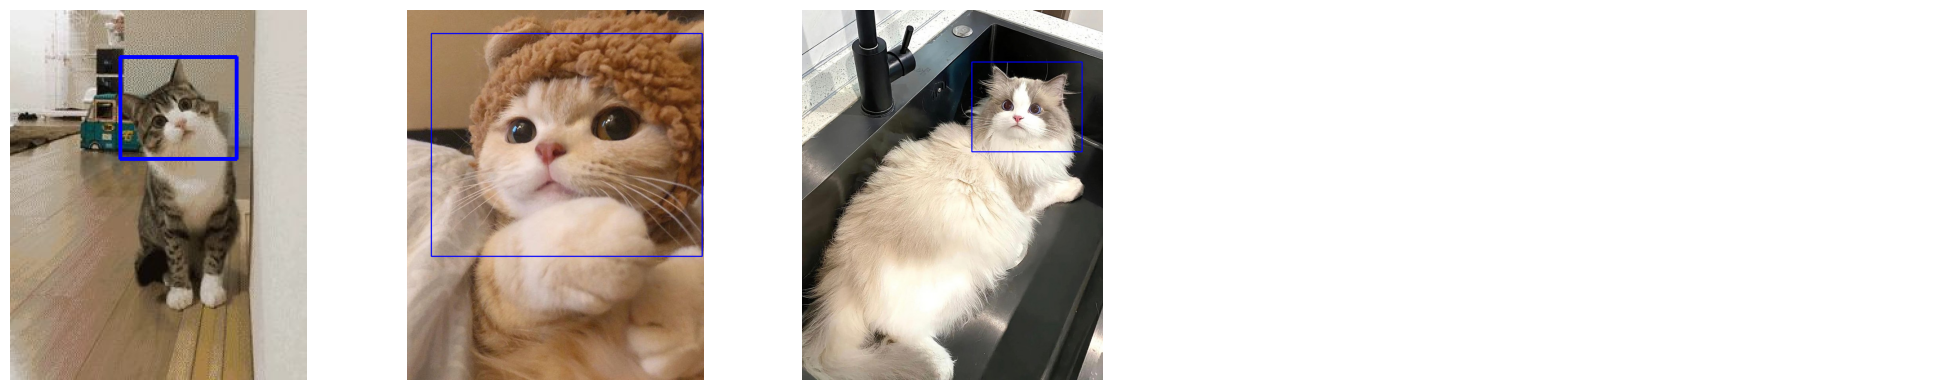

In [ ]:
visualize_images_with_predictions(model=model,
                                  image_paths = ['/content/drive/MyDrive/Colab Notebooks/비타민 14기/여름 CV/catface_bbox/cat_test_1.jpg',
                                                '/content/drive/MyDrive/Colab Notebooks/비타민 14기/여름 CV/catface_bbox/cat_test_2.jpg',
                                                '/content/drive/MyDrive/Colab Notebooks/비타민 14기/여름 CV/catface_bbox/cat_test_3.jpeg'])

## 라벨링 없는 데이터셋에 모델 적용

In [ ]:
model.eval()

Ultralytics YOLOv8.2.78 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/Colab Notebooks/비타민 14기/여름 CV/wholecat_bbox/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=Fal

train: Scanning /content/drive/MyDrive/Colab Notebooks/비타민 14기/여름 CV/wholecat_bbox/train/labels.cache... 1380 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1380/1380 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Colab Notebooks/비타민 14기/여름 CV/wholecat_bbox/valid/labels.cache... 249 images, 0 backgrounds, 0 corrupt: 100%|██████████| 249/249 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         7G      1.418      2.395      1.901          3        640: 100%|██████████| 87/87 [00:27<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.29it/s]

                   all        249        254      0.202      0.413      0.252      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      6.95G      1.102      1.693      1.607          4        640: 100%|██████████| 87/87 [00:26<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.45it/s]

                   all        249        254      0.195      0.441      0.216      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      6.93G      1.126      1.627      1.613          4        640: 100%|██████████| 87/87 [00:26<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.33it/s]

                   all        249        254      0.178      0.552      0.239      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      6.85G      1.137      1.547      1.637          4        640: 100%|██████████| 87/87 [00:26<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.35it/s]

                   all        249        254      0.225      0.579      0.247      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      6.93G      1.131      1.434      1.604          3        640: 100%|██████████| 87/87 [00:26<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.32it/s]

                   all        249        254      0.212      0.411      0.258      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      6.91G      1.066       1.41      1.536          4        640: 100%|██████████| 87/87 [00:26<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.49it/s]

                   all        249        254      0.245      0.376      0.254       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      6.94G      1.022      1.293      1.501          4        640: 100%|██████████| 87/87 [00:26<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.41it/s]

                   all        249        254      0.212      0.558      0.295      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      6.84G      1.039      1.285      1.512          7        640: 100%|██████████| 87/87 [00:26<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.49it/s]

                   all        249        254      0.261      0.461      0.281      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      6.93G     0.9896      1.233      1.472          2        640: 100%|██████████| 87/87 [00:26<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.39it/s]

                   all        249        254      0.187      0.511      0.254      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      6.91G      1.003      1.181      1.484          4        640: 100%|██████████| 87/87 [00:26<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.41it/s]

                   all        249        254      0.223      0.482      0.224      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      6.95G     0.9432      1.134      1.442          3        640: 100%|██████████| 87/87 [00:26<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.47it/s]

                   all        249        254      0.254      0.518       0.28      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      6.85G     0.9589      1.101       1.45          4        640: 100%|██████████| 87/87 [00:26<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.39it/s]

                   all        249        254      0.271      0.516      0.283      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      6.93G     0.9071      1.069      1.405          2        640: 100%|██████████| 87/87 [00:26<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.45it/s]

                   all        249        254       0.28      0.519      0.328      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      6.92G     0.8921      1.004      1.392          4        640: 100%|██████████| 87/87 [00:26<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.47it/s]

                   all        249        254      0.284      0.509      0.277      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      6.93G     0.9163      1.026      1.408          4        640: 100%|██████████| 87/87 [00:26<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.41it/s]

                   all        249        254      0.299      0.409      0.309      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      6.84G     0.8699     0.9381      1.383          4        640: 100%|██████████| 87/87 [00:26<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.40it/s]

                   all        249        254      0.325      0.522      0.294      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      6.93G     0.8296      0.922      1.346          4        640: 100%|██████████| 87/87 [00:26<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.44it/s]

                   all        249        254      0.265        0.5      0.246      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      6.92G     0.8152     0.8786      1.325          3        640: 100%|██████████| 87/87 [00:26<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.47it/s]

                   all        249        254      0.303      0.491      0.271      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      6.95G     0.8035     0.8594      1.305          4        640: 100%|██████████| 87/87 [00:26<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.44it/s]

                   all        249        254      0.229       0.55      0.296      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      6.84G     0.7854     0.8209      1.296          4        640: 100%|██████████| 87/87 [00:26<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.45it/s]

                   all        249        254      0.275      0.547      0.338      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      6.93G     0.7624     0.7832      1.281          3        640: 100%|██████████| 87/87 [00:26<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.45it/s]

                   all        249        254      0.301      0.547      0.336      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      6.91G      0.768     0.7877      1.276          4        640: 100%|██████████| 87/87 [00:26<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.44it/s]

                   all        249        254      0.266      0.512       0.28      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      6.95G     0.7474     0.7689      1.268          4        640: 100%|██████████| 87/87 [00:26<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.53it/s]

                   all        249        254      0.235      0.531      0.295      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      6.84G     0.7307     0.7449      1.249          4        640: 100%|██████████| 87/87 [00:26<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.40it/s]

                   all        249        254      0.227      0.505      0.297      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      6.93G     0.7207     0.6846       1.25          2        640: 100%|██████████| 87/87 [00:26<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.50it/s]

                   all        249        254      0.334       0.35      0.304      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       6.9G     0.7014      0.674       1.23          4        640: 100%|██████████| 87/87 [00:26<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.34it/s]

                   all        249        254      0.256      0.459      0.281      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      6.95G     0.6899     0.6439      1.222          4        640: 100%|██████████| 87/87 [00:26<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.45it/s]

                   all        249        254      0.313      0.427       0.32      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      6.84G     0.6728     0.6553      1.195          3        640: 100%|██████████| 87/87 [00:26<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.40it/s]

                   all        249        254      0.287      0.482      0.316      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      6.92G     0.6698     0.6102      1.191          4        640: 100%|██████████| 87/87 [00:26<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.45it/s]

                   all        249        254      0.285      0.342      0.263      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      6.92G     0.6479      0.597      1.181          3        640: 100%|██████████| 87/87 [00:26<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.50it/s]

                   all        249        254      0.318      0.435      0.318      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      6.96G     0.6266     0.5578      1.168          4        640: 100%|██████████| 87/87 [00:26<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.40it/s]

                   all        249        254       0.31       0.46      0.343      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      6.84G     0.6264     0.5555      1.157          4        640: 100%|██████████| 87/87 [00:26<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.43it/s]

                   all        249        254      0.228      0.547      0.292      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      6.93G     0.6263     0.5474      1.164          4        640: 100%|██████████| 87/87 [00:26<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.42it/s]

                   all        249        254        0.3      0.422      0.323      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       6.9G     0.5909      0.513      1.131          4        640: 100%|██████████| 87/87 [00:26<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.42it/s]

                   all        249        254       0.29      0.461      0.301      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      6.96G      0.576     0.4854      1.118          4        640: 100%|██████████| 87/87 [00:26<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.48it/s]

                   all        249        254      0.364      0.443      0.321      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      6.85G     0.5586     0.4731        1.1          3        640: 100%|██████████| 87/87 [00:26<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.28it/s]

                   all        249        254      0.257       0.47      0.288      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.93G     0.5442     0.4507      1.098          4        640: 100%|██████████| 87/87 [00:26<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.43it/s]

                   all        249        254      0.307      0.415      0.293      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.91G     0.5429     0.4423       1.09          4        640: 100%|██████████| 87/87 [00:26<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.40it/s]

                   all        249        254      0.338      0.408      0.299      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.95G      0.525     0.4376      1.071          5        640: 100%|██████████| 87/87 [00:26<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.43it/s]

                   all        249        254        0.3      0.388      0.307       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      6.84G     0.5026     0.4019      1.059          4        640: 100%|██████████| 87/87 [00:26<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.45it/s]

                   all        249        254      0.333      0.426      0.312      0.187


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.92G     0.4939     0.4159      1.047          4        640: 100%|██████████| 87/87 [00:27<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.36it/s]

                   all        249        254      0.259      0.473      0.299      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      6.92G     0.4737     0.3758      1.035          3        640: 100%|██████████| 87/87 [00:26<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.36it/s]

                   all        249        254      0.326      0.497      0.334      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.96G     0.4806     0.3744      1.029          4        640: 100%|██████████| 87/87 [00:26<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.45it/s]

                   all        249        254      0.275       0.43      0.292       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.85G     0.4708     0.3533      1.022          3        640: 100%|██████████| 87/87 [00:26<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.50it/s]

                   all        249        254      0.276      0.564      0.294      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.92G     0.4515     0.3623      1.024          4        640: 100%|██████████| 87/87 [00:26<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.43it/s]

                   all        249        254       0.34      0.367      0.302      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      6.92G     0.4372     0.3353      1.008          4        640: 100%|██████████| 87/87 [00:26<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.53it/s]

                   all        249        254      0.269      0.484      0.317      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.95G     0.4351     0.3355      1.017          3        640: 100%|██████████| 87/87 [00:26<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.39it/s]

                   all        249        254      0.326       0.41      0.307       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.84G     0.4318     0.3385      1.013          3        640: 100%|██████████| 87/87 [00:26<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.48it/s]

                   all        249        254      0.311      0.418      0.303      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      6.93G     0.4287     0.3285      1.004          3        640: 100%|██████████| 87/87 [00:26<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.42it/s]

                   all        249        254       0.37      0.354       0.31      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      6.92G      0.421     0.3234      1.002          4        640: 100%|██████████| 87/87 [00:26<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.45it/s]

                   all        249        254      0.375       0.36      0.309      0.193



50 epochs completed in 0.427 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 52.0MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.78 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 218 layers, 25,844,392 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.24it/s]


                   all        249        254      0.309      0.457      0.343      0.214
                 Anger         28         28       0.31      0.857      0.688      0.517
                   Beg         31         31      0.283      0.548      0.257      0.139
            Frightened          5          5     0.0443        0.2     0.0526     0.0373
                 Happy         67         67      0.742      0.172      0.407      0.234
                 Scare         10         10       0.12        0.6      0.318      0.146
                  Sick         36         36       0.43      0.556      0.472      0.301
                Sleepy          9          9      0.081      0.222     0.0806     0.0489
                Wonder         63         68      0.465      0.499      0.469      0.291
Speed: 0.2ms preprocess, 5.5ms inference, 0.0ms loss, 5.9ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ed8e7e3d630>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,

In [ ]:
def cropped_img(input_base_dir, output_base_dir):
  # 감정 리스트: 직접입력
  emotions = ['Surprised', 'Scared', 'Sad', 'Normal', 'Happy', 'Disgusted', 'Angry']

  # 감정별 디렉토리 생성
  for emotion in emotions:
      os.makedirs(os.path.join(output_base_dir, emotion), exist_ok=True)

  # 각 감정 디렉토리의 이미지를 처리
  for emotion in emotions:
      input_dir = os.path.join(input_base_dir, emotion)
      output_dir = os.path.join(output_base_dir, emotion)

      # 디렉토리 내 모든 파일에 대해 바운딩 박스 예측 및 크롭
      for img_name in os.listdir(input_dir):
          img_path = os.path.join(input_dir, img_name)
          img = Image.open(img_path)
          results = model(img)

          # 결과에서 바운딩 박스 정보 추출
          for i, result in enumerate(results):
              for box in result.boxes:
                  # 바운딩 박스 좌표 추출 (정수형으로 변환)
                  xmin, ymin, xmax, ymax = map(int, box.xyxy[0].tolist())

                  # 바운딩 박스 크롭
                  cropped_img = img.crop((xmin, ymin, xmax, ymax))

                  # 크롭한 이미지 저장 (여러 바운딩 박스가 있을 경우, 숫자로 구분)
                  cropped_img_name = f"{os.path.splitext(img_name)[0]}_crop{i}.jpg"
                  cropped_img.save(os.path.join(output_dir, cropped_img_name))

          print(f"Processed {img_name} in {emotion}")

  print("All images processed and saved.")

In [ ]:
# cat_roboflow train
input_train_dir = '/content/drive/MyDrive/Colab Notebooks/비타민 14기/여름 CV/cat_roboflow/train/'
output_train_dir = '/content/drive/MyDrive/Colab Notebooks/비타민 14기/여름 CV/cat_roboflow/train_cropped/'
cropped_img(input_train_dir, output_train_dir)


0: 640x640 1 Wonder, 23.5ms
Speed: 4.6ms preprocess, 23.5ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)
Processed 16_surp_jpeg.rf.e32dae81c2c08f5abd39527fde05bc16.jpg in Surprised

0: 640x640 1 Scare, 10.0ms
Speed: 1.7ms preprocess, 10.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Processed 25_surp_jpeg.rf.d51be4ef09fe00bd9985850e43cc9ab9.jpg in Surprised

0: 640x640 1 Anger, 10.3ms
Speed: 1.7ms preprocess, 10.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Processed 14_surp_jpeg.rf.374359cb0a8d62e4f7880bf95ab3b4f5.jpg in Surprised

0: 640x640 1 Frightened, 1 Wonder, 9.9ms
Speed: 1.6ms preprocess, 9.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Processed 26_surp_jpeg.rf.94de6ec3ef73ecc2fed5903bddf7473d.jpg in Surprised

0: 640x640 1 Frightened, 1 Scare, 1 Wonder, 10.1ms
Speed: 1.7ms preprocess, 10.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Processed 15_surp_jpeg.rf.8da6606

In [ ]:
# cat_roboflow valid
input_valid_dir = '/content/drive/MyDrive/Colab Notebooks/비타민 14기/여름 CV/cat_roboflow/valid/'
output_valid_dir = '/content/drive/MyDrive/Colab Notebooks/비타민 14기/여름 CV/cat_roboflow/valid_cropped/'
cropped_img(input_valid_dir, output_valid_dir)


0: 640x640 1 Wonder, 10.6ms
Speed: 1.7ms preprocess, 10.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Processed 12_surp_jpeg.rf.5f16d1e1a3c5aa6071d728449a7cb8e5.jpg in Surprised

0: 640x640 (no detections), 10.1ms
Speed: 1.7ms preprocess, 10.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Processed 33_surp_jpeg.rf.88267371c1a61edbae847093059683c4.jpg in Surprised

0: 640x640 1 Frightened, 1 Wonder, 12.1ms
Speed: 2.0ms preprocess, 12.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Processed 5_surp_jpeg.rf.5644c722024b69b92fefa8e7943342ea.jpg in Surprised

0: 640x640 1 Frightened, 10.1ms
Speed: 1.7ms preprocess, 10.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Processed 87_surp_jpeg.rf.ef43af1e62ad8ebc078862d5b3b7d81f.jpg in Surprised

0: 640x640 1 Anger, 10.1ms
Speed: 1.7ms preprocess, 10.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Processed 19_surp_jpeg.rf.7e3520f3e4e27f7ed

## EfficientNet 연결

In [ ]:
class EmotionDataset(Dataset):
    def __init__(self, root_dir, split='train', transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []
        self.class_names = []

        # 디렉토리별 이미지 로드
        for class_name in os.listdir(self.root_dir):
            class_dir = os.path.join(self.root_dir, class_name)
            if os.path.isdir(class_dir):
                self.class_names.append(class_name)
                for img_name in os.listdir(class_dir):
                    img_path = os.path.join(class_dir, img_name)
                    if img_path.endswith(('.png', '.jpg', '.jpeg')):
                        self.image_paths.append(img_path)
                        self.labels.append(class_name)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.class_names.index(self.labels[idx])

        if self.transform:
            image = self.transform(image)

        return image, label

In [33]:
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ColorJitter(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomAutocontrast(),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [34]:
# Dataset&Dataloader 만들기
train_dir = '/content/drive/MyDrive/Colab Notebooks/비타민 14기/여름 CV/cat_roboflow/train_cropped/'
valid_dir = '/content/drive/MyDrive/Colab Notebooks/비타민 14기/여름 CV/cat_roboflow/valid_cropped/'

# Train 데이터셋과 DataLoader 생성
train_dataset = EmotionDataset(root_dir=train_dir, transform=train_transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Validation 데이터셋과 DataLoader 생성
valid_dataset = EmotionDataset(root_dir=valid_dir, transform=test_transform)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)

In [35]:
from collections import Counter
# 클래스별 데이터 개수 세기
class_labels = train_dataset.labels
class_counts = Counter(class_labels)

# 클래스별 데이터 개수 출력
for class_name, count in class_counts.items():
    print(f"Class: {class_name}, Count: {count}")

Class: Surprised, Count: 87
Class: Scared, Count: 66
Class: Sad, Count: 59
Class: Normal, Count: 73
Class: Happy, Count: 50
Class: Disgusted, Count: 53
Class: Angry, Count: 65


In [36]:
train_dataset.__len__()

453

In [37]:
valid_dataset.__len__()

148

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install efficientnet_pytorch

  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16425 sha256=78bc1caad2b42cef49715d26d4d39851ba1a2472386b4364f737634b3c965882
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
Successfully built efficientnet_pytorch


In [38]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [39]:
from efficientnet_pytorch import EfficientNet
eff_model = EfficientNet.from_pretrained('efficientnet-b0')

Loaded pretrained weights for efficientnet-b0


In [42]:
def train_and_evaluate(model, train_loader, valid_loader, num_epochs=50, device='cuda'):
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=1e-5)

    # ReduceLROnPlateau 스케줄러 사용
    lr_scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, verbose=True)

    train_losses = []
    valid_losses = []
    train_accuracies = []
    valid_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        correct_train = 0
        total_train = 0

        # Training loop
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            train_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        avg_train_loss = train_loss / len(train_loader)
        train_accuracy = 100 * correct_train / total_train
        train_losses.append(avg_train_loss)
        train_accuracies.append(train_accuracy)
        print(f"Epoch {epoch+1}, Training Loss: {avg_train_loss:.3f}, Training Accuracy: {train_accuracy:.3f}%")

        # Validation loop
        model.eval()
        valid_loss = 0.0
        correct_valid = 0
        total_valid = 0
        with torch.no_grad():
            for images, labels in valid_loader:
                images = images.to(device)
                labels = labels.to(device)

                outputs = model(images)
                loss = criterion(outputs, labels)

                valid_loss += loss.item()

                # Calculate accuracy
                _, predicted = torch.max(outputs, 1)
                total_valid += labels.size(0)
                correct_valid += (predicted == labels).sum().item()

        avg_valid_loss = valid_loss / len(valid_loader)
        valid_accuracy = 100 * correct_valid / total_valid
        valid_losses.append(avg_valid_loss)
        valid_accuracies.append(valid_accuracy)
        print(f"Epoch {epoch+1}, Validation Loss: {avg_valid_loss:.3f}, Validation Accuracy: {valid_accuracy:.3f}%")

        # ReduceLROnPlateau 스케줄러 업데이트
        lr_scheduler.step(avg_valid_loss)

    return train_losses, valid_losses, train_accuracies, valid_accuracies

In [43]:
train_losses, valid_losses, train_accuracies, valid_accuracies = train_and_evaluate(
    eff_model, train_loader, valid_loader, num_epochs=50, device='cuda'
)

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch 1, Training Loss: 0.147, Training Accuracy: 95.364%
Epoch 1, Validation Loss: 2.253, Validation Accuracy: 61.486%
Epoch 2, Training Loss: 0.288, Training Accuracy: 92.936%
Epoch 2, Validation Loss: 2.524, Validation Accuracy: 53.378%
Epoch 3, Training Loss: 0.174, Training Accuracy: 94.702%
Epoch 3, Validation Loss: 2.565, Validation Accuracy: 58.108%
Epoch 4, Training Loss: 0.202, Training Accuracy: 94.702%
Epoch 4, Validation Loss: 2.652, Validation Accuracy: 54.730%
Epoch 5, Training Loss: 0.298, Training Accuracy: 93.819%
Epoch 5, Validation Loss: 2.578, Validation Accuracy: 52.027%
Epoch 6, Training Loss: 0.315, Training Accuracy: 94.923%
Epoch 6, Validation Loss: 3.091, Validation Accuracy: 45.270%
Epoch 7, Training Loss: 0.204, Training Accuracy: 93.157%
Epoch 7, Validation Loss: 2.221, Validation Accuracy: 58.784%
Epoch 8, Training Loss: 0.232, Training Accuracy: 96.689%
Epoch 8, Validation Loss: 2.256, Validation Accuracy: 56.757%
Epoch 9, Training Loss: 0.177, Training 

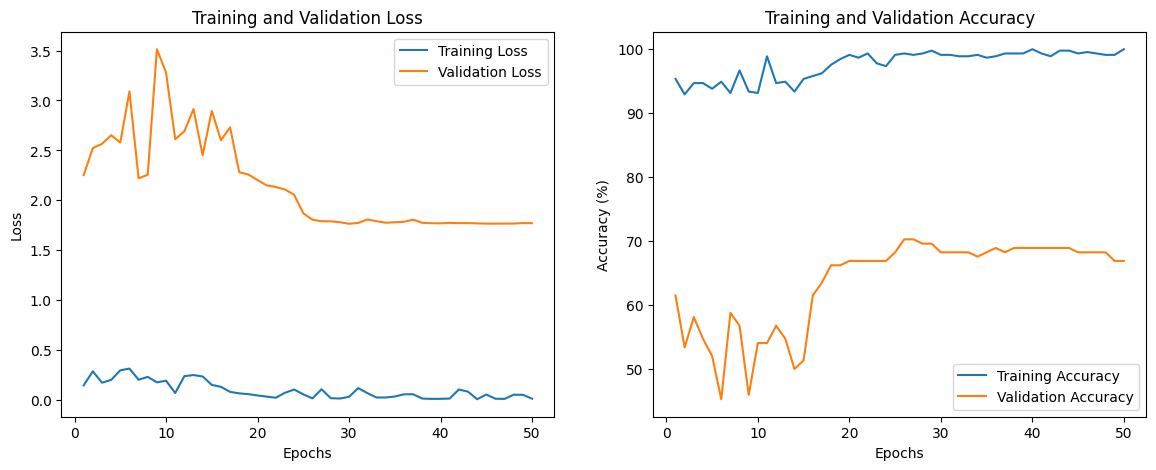

In [44]:
epochs = range(1, 51)

plt.figure(figsize=(14, 5))

# 손실 그래프
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, valid_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, valid_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

In [ ]:
def predict_emotion(image_path, model=eff_model):
  # 이미지 불러오기
  image = Image.open(image_path)  # 경로를 실제 이미지 파일로 변경하세요.

  # 이미지 전처리
  preprocess = transforms.Compose([
      transforms.Resize(256),       # 이미지를 256x256 크기로 리사이즈
      transforms.CenterCrop(224),   # 중앙을 기준으로 224x224 크기로 자르기
      transforms.ToTensor(),        # PIL 이미지를 텐서로 변환
  ])

  # 이미지를 전처리 후 배치 차원을 추가
  image_tensor = preprocess(image).unsqueeze(0)

  model.eval()

  plt.figure()
  plt.imshow(image)
  plt.title("Input Image")
  plt.axis('off')
  plt.show()

  with torch.no_grad():
    image_tensor = image_tensor.to(device)
    outputs = model(image_tensor)
    _, predicted_class = torch.max(outputs, 1)

  # 4. 클래스 매핑
  emotions = ['Surprised', 'Scared', 'Sad', 'Normal', 'Happy', 'Disgusted', 'Angry']
  predicted_label = emotions[predicted_class.item()]
  print(f"Predicted label: {predicted_label}")

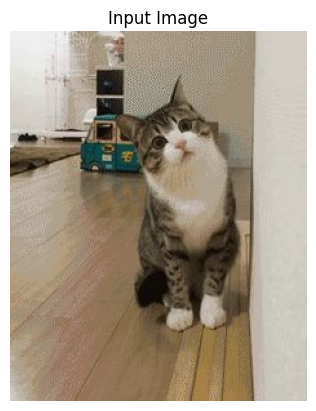

Predicted label: Disgusted


In [ ]:
predict_emotion('/content/drive/MyDrive/Colab Notebooks/비타민 14기/여름 CV/catface_bbox/cat_test_1.jpg')